In [1]:
from comparison import tests, ORDER
import pandas as pd
import numpy as np

In [2]:
ORDER

['number_of_nodes', 'features', 'include_node_features', 'normalize']

In [3]:
arguments_list = []

for number_of_nodes in [7]:
    for features in [("moltop",), ("moltop","ltp")]:
        features = np.array(features)
        for include_node_features in [True, False]:
            for normalize in [True, False]:
                arguments_list.append(dict(number_of_nodes=number_of_nodes,
                                            features=features,
                                            include_node_features=include_node_features,
                                            normalize=normalize))

In [4]:
tests(arguments_list)

[(np.float16(-1.0), np.float16(-0.5713)), (np.float16(0.0476), np.float16(0.2856)), (np.float16(0.2236), np.float16(0.857)), (np.float16(0.1428), np.float16(0.857)), (np.float16(0.1428), np.float16(0.857)), (np.float16(0.1428), np.float16(0.857)), (np.float16(0.1428), np.float16(0.857)), (np.float16(0.0), np.float16(0.0204))]
0
[-1]
[(np.float16(-1.0), np.float16(-0.5713)), (np.float16(2.0), np.float16(12.0)), (np.float16(0.2236), np.float16(0.857)), (np.float16(0.1428), np.float16(0.857)), (np.float16(0.1428), np.float16(0.857)), (np.float16(0.1428), np.float16(0.857)), (np.float16(0.1428), np.float16(0.857)), (np.float16(0.0), np.float16(0.0204))]
0
[-1]
[(np.float16(-1.0), np.float16(-0.5713)), (np.float16(0.0476), np.float16(0.2856)), (np.float16(0.2236), np.float16(0.857))]
0
[-1]
[(np.float16(-1.0), np.float16(-0.5713)), (np.float16(2.0), np.float16(12.0)), (np.float16(0.2236), np.float16(0.857))]
0
[-1]
[(np.float16(-1.0), np.float16(-0.5713)), (np.float16(0.0476), np.float16(0.

In [5]:
test_data = pd.read_parquet('processed_datasets/table.parquet')
test_data['count'] = test_data['result'].apply(len)

In [6]:
test_data

,number_of_nodes,features,include_node_features,normalize,result,count
0,7,[moltop],True,True,[-1],1
0,7,[moltop],True,False,[-1],1
0,7,[moltop],False,True,[-1],1
0,7,[moltop],False,False,[-1],1
0,7,"[moltop, ltp]",True,True,[-1],1
0,7,"[moltop, ltp]",True,False,[-1],1
0,7,"[moltop, ltp]",False,True,[-1],1
0,7,"[moltop, ltp]",False,False,[-1],1


In [7]:
import seaborn as sns
test_data['features'] = test_data['features'].astype('string').astype('category')
test_data.columns

Index(['number_of_nodes', 'features', 'include_node_features', 'normalize',
       'result', 'count'],
      dtype='object')

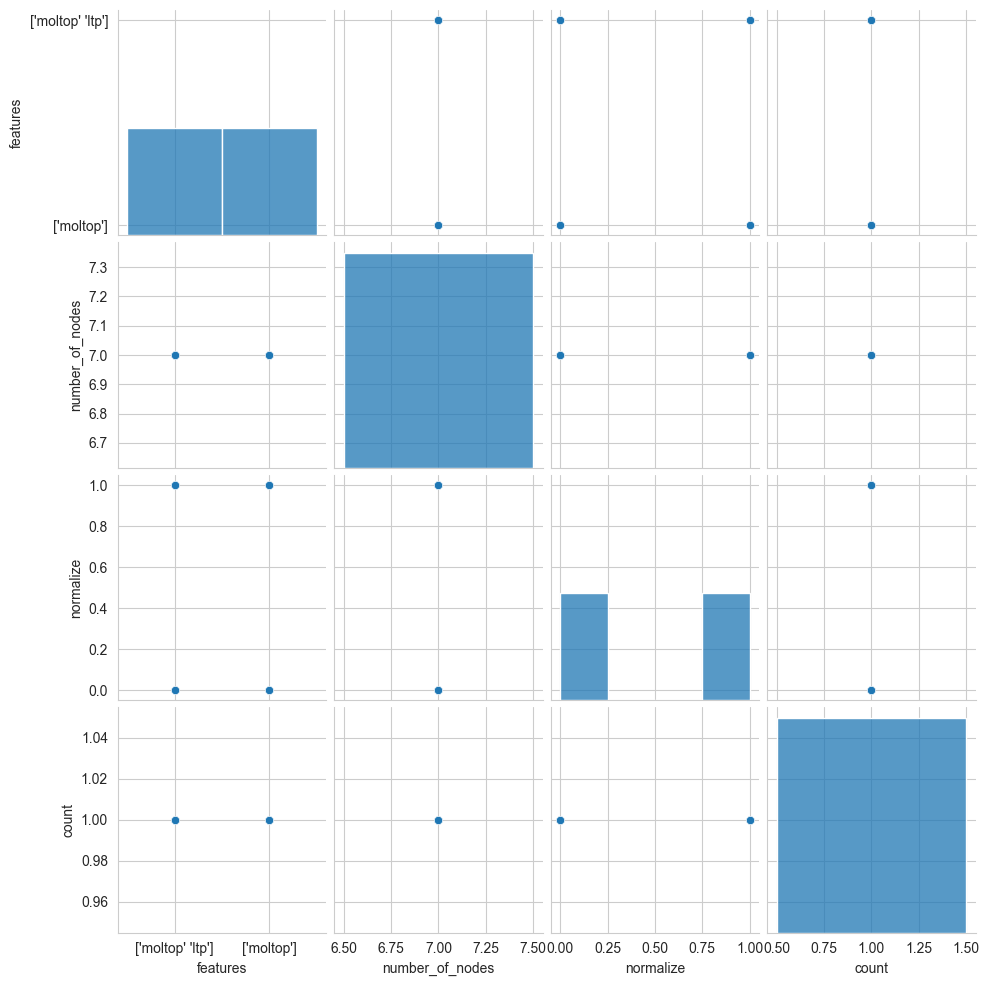

In [8]:
sns.pairplot(test_data.drop(columns=['result']), vars=['features', 'number_of_nodes', 'normalize', 'count'])